In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26820 sha256=2fa0a4c32baccd3df905521a567de68e882ee2ec3863547761f58051b2b322c1
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [ ]:
#Para hacer las consultas se cargaran las bases en csv, se obtendran las consultas encesarias y se operara sobre estas.
import pandas as pd
import numpy as np
import pandasql as ps

#1. En base a la edad de un nuevo cliente, predecir con que tipo de pago realizara su compra. 

Para esta consulta, primero debemos de obtener los datos correspondientes a las tablas de cliente, hechos y tipo pago:

In [ ]:
hechos=pd.read_csv('/content/hechos.csv')
cliente=pd.read_csv('/content/cliente.csv')
pago = pd.read_csv('/content/pago.csv')

Teniendo los datos cargados, realizamos una consulta para obtener las tuplas correspondientes a las fechas de los clientes y sus tipos de pago registrados.

In [ ]:
#Guardamos en una tabla el dataframe correspondiente a las fechas de nacimiento de los clientes registrados junto con sus tipos de pago. 
q1="""SELECT 
fecha_nacimiento, tipo_pago_id
FROM
cliente JOIN hechos ON cliente.cliente_id == hechos.cliente_id"""
data = ps.sqldf(q1,locals())

In [ ]:
data.head()

,fecha_nacimiento,tipo_pago_id
0,1998-12-03,efectivo
1,1990-02-16,tarjeta de credito
2,1956-06-17,tarjeta de debito
3,1973-10-26,tarjeta de credito
4,1973-08-30,tarjeta de credito


In [ ]:
#Cambiamos el tipo de dato a fecha para operar con esta columna.
data['fecha_nacimiento'] = pd.to_datetime(data['fecha_nacimiento'], format='%Y/%m/%d')
data.sort_values(by='fecha_nacimiento')

,fecha_nacimiento,tipo_pago_id
22,1956-05-17,tarjeta de debito
2,1956-06-17,tarjeta de debito
12,1956-06-17,tarjeta de debito
32,1956-08-17,tarjeta de debito
33,1973-05-26,tarjeta de credito
24,1973-05-30,tarjeta de credito
23,1973-07-26,tarjeta de credito
13,1973-07-26,tarjeta de credito
4,1973-08-30,tarjeta de credito
14,1973-08-30,tarjeta de credito


Teniendo los datos ordenados, procedemos a realizar el algoritmo de K-Nearest Neighbors

In [ ]:
def predict_payment_type(date_birth, k=7):   
  '''
  A la funcion se le pasa una fecha a consultar junto con 
  el numero de vecinos en el quese fijara el
  algoritmo para realizar la busqueda.
  '''
  date_birth = pd.to_datetime(date_birth, format='%Y/%m/%d')
  labels = list(set(data['tipo_pago_id']))

  vals = range(len(labels))
  lbls = zip(labels,vals)
  labels_dict = dict(lbls)
  freqs = [0]*len(labels)

  backward = k//2 
  forward = k//2 + 1

  forwards = list(data[data['fecha_nacimiento'] > date_birth]['tipo_pago_id'])
  backwards = list(data[data['fecha_nacimiento'] < date_birth]['tipo_pago_id'])
  backwards.reverse()

  distance_1 = min(len(backwards),backward)
  distance_2 = min(len(forwards),forward)

  for i in range(distance_1):
    labl = backwards[i]
    freqs[labels_dict[labl]]+=1

  for i in range(distance_2):
    labl = forwards[i]
    freqs[labels_dict[labl]]+=1
  
  prediction_index = np.argmax(freqs)

  return list(labels_dict.keys())[prediction_index]

In [ ]:
print(predict_payment_type('1970-10-28'))
print(predict_payment_type('1974-06-03'))
print(predict_payment_type('1999-07-12'))

tarjeta de debito                       
tarjeta de credito                      
efectivo                                


#2. En base a la edad de un nuevo cliente, predecir si es asiduo o eventual.

Esta consulta se puede hacer de manera muy similar a la anterior utilizando el algoritmo de KNN, la unica diferencia estara en las etiquietas que se evaluaran.

In [ ]:
 tipo_cliente = pd.read_csv('/content/tipo_cliente.csv')

In [ ]:
#Guardamos en una tabla el dataframe correspondiente a las fechas de nacimiento de los clientes registrados junto con sus tipos de pago. 
q2="""SELECT 
fecha_nacimiento, tipo_cliente_desc
FROM
cliente JOIN tipo_cliente ON cliente.tipo_clente_id == tipo_cliente.tipo_clente_id"""
data2 = ps.sqldf(q2,locals())
data2['fecha_nacimiento'] = pd.to_datetime(data2['fecha_nacimiento'], format='%Y/%m/%d')
data2.sort_values(by='fecha_nacimiento')
data2.head()

,fecha_nacimiento,tipo_cliente_desc
0,1998-12-03,asiduo
1,1990-02-16,asiduo
2,1956-06-17,asiduo
3,1973-10-26,asiduo
4,1973-08-30,asiduo


In [ ]:
def predict_client_type(date_birth, k=7):   
  '''
  A la funcion se le pasa una fecha a consultar junto con 
  el numero de vecinos en el quese fijara el
  algoritmo para realizar la busqueda.
  '''
  date_birth = pd.to_datetime(date_birth, format='%Y/%m/%d')
  labels = list(set(data2['tipo_cliente_desc']))

  vals = range(len(labels))
  lbls = zip(labels,vals)
  labels_dict = dict(lbls)
  freqs = [0]*len(labels)

  backward = k//2 
  forward = k//2 + 1

  forwards = list(data2[data2['fecha_nacimiento'] > date_birth]['tipo_cliente_desc'])
  backwards = list(data2[data2['fecha_nacimiento'] < date_birth]['tipo_cliente_desc'])
  backwards.reverse()

  distance_1 = min(len(backwards),backward)
  distance_2 = min(len(forwards),forward)

  for i in range(distance_1):
    labl = backwards[i]
    freqs[labels_dict[labl]]+=1

  for i in range(distance_2):
    labl = forwards[i]
    freqs[labels_dict[labl]]+=1
  
  prediction_index = np.argmax(freqs)

  return list(labels_dict.keys())[prediction_index]

In [ ]:
#Realizamos las consultas predectivas con la funcion creada anteriormente
print(predict_client_type('1970-10-28'))
print(predict_client_type('1974-06-03'))
print(predict_client_type('1999-07-12'))

asiduo                                  
asiduo                                  
eventual                                


#3. Predecir entradas vendidas por mes. 

Tomaremos los datos de hechos y horarios para poder obtener la fecha de las visitas al cine y el numero de entradas que se compraron por mes.

In [ ]:
hechos=pd.read_csv('hechos.csv')
horario=pd.read_csv('horario.csv')

Uniremos las dos tablas necesarias mediante una consulta de sql para poder obtener las fechas y numero de entradas compradas por los clientes

In [ ]:
q1="""SELECT fecha, sum(num_entradas) as num_entradas, importe 
FROM
horario JOIN hechos ON horario.hora == hechos.hora
GROUP BY fecha
"""
data = ps.sqldf(q1,locals())

Agruparemos los datos por mes, es decir, sumaremos todas las entradas vendidas en Enero, después las de Febrero y asi sucesivamente para obtener los totales vendidos por mes.

In [ ]:
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y/%m/%d')
data.sort_values(by='fecha')
data.index = data['fecha']
data.resample("M").sum()

,num_entradas
fecha,
2019-01-31,14
2019-02-28,0
2019-03-31,56
2019-04-30,0
2019-05-31,19
2019-06-30,0
2019-07-31,25
2019-08-31,65
2019-09-30,0


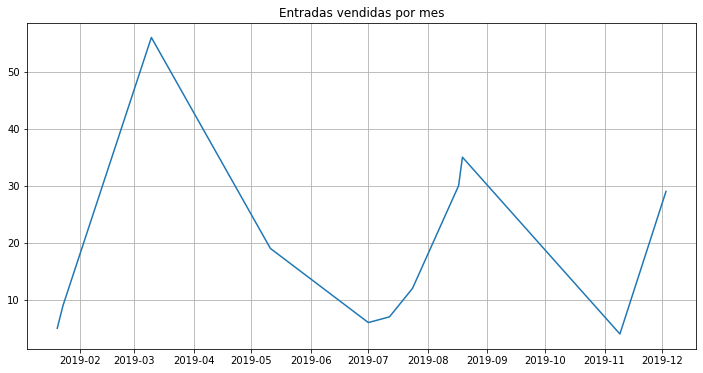

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data.num_entradas)
plt.title('Entradas vendidas por mes')
plt.grid()
plt.show()

Utilizaremos medias moviles para poder encontrar el patron con el que los cliente visitan y compran entradas en el cine, utilizando una ventana de 2 meses obtenermos la siguiente aproximación.

In [ ]:
def moving_mean(serie,n):
    return np.average(serie[-n:])

from sklearn.metrics import mean_absolute_error

def mean_absolute_porcentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

def plotMovingAverage(series, window, intervals=False, scale=1.96, plot_anomalies=False):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(15,3))
    plt.title('Media movil \ntamaño de ventana ={}'.format(window))
    plt.plot(rolling_mean,'g', label='Tendencia por media movil')

    #Intervalo de confianza
    if intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:]-rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(lower_bound, 'r--', label='Límite sup/inf')
        plt.plot(upper_bound, 'r--')

    #Anomalias
    if plot_anomalies:
        anomalies = pd.DataFrame(index=series.index, columns=series.columns)
        anomalies[series < lower_bound ]= series[ series < lower_bound]
        anomalies[series > upper_bound ]= series[ series > upper_bound]
        plt.plot(anomalies, 'ro', markersize =10)

    plt.plot(series[window:], label='Valores reales')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

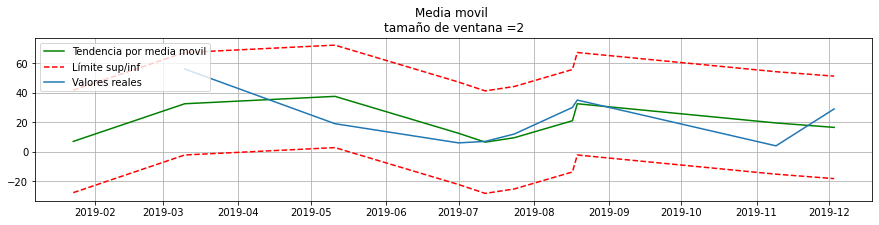

In [ ]:
plotMovingAverage(data.num_entradas,2,intervals=True, scale=1.96)

Tambien aplicando K-vecinos cercanos podemos obtener una predicción sobre el número de entradas que se venderán en determinada fecha.

In [ ]:
def predict_tickets(date, consult, k=7):   
  '''
  A la funcion se le pasa una fecha a consultar junto con 
  el numero de vecinos en el quese fijara el
  algoritmo para realizar la busqueda.
  '''
  date = pd.to_datetime(date, format='%Y/%m/%d')
  labels = list(set(consult['num_entradas']))

  vals = range(len(labels))
  lbls = zip(labels,vals)
  labels_dict = dict(lbls)
  freqs = [0]*len(labels)

  backward = k//2 
  forward = k//2 + 1

  forwards = list(consult[consult['fecha'] > date]['num_entradas'])
  backwards = list(consult[consult['fecha'] < date]['num_entradas'])
  backwards.reverse()

  distance_1 = min(len(backwards),backward)
  distance_2 = min(len(forwards),forward)

  for i in range(distance_1):
    labl = backwards[i]
    freqs[labels_dict[labl]]+=1

  for i in range(distance_2):
    labl = forwards[i]
    freqs[labels_dict[labl]]+=1
  
  prediction_index = np.argmax(freqs)

  return list(labels_dict.keys())[prediction_index]

In [ ]:
print(predict_tickets('2020-01-31',data))
print(predict_tickets('2000-10-03',data))

35
5


## 4.Decidir tipo de sala en oferta

In [ ]:
import pandas as pd 
import pandasql as ps
import numpy

In [ ]:
hechos=pd.read_csv('/hechos.csv')
sala =pd.read_csv('/sala.csv')
tipo_sala =pd.read_csv('/tipo_sala.csv')

In [ ]:
hechos.head()

,sala_id,cliente_id,pelicula_id,hora,tipo_pago_id,num_entradas,importe
0,101,1,1,12:05:06,efectivo,3,$ 450.00
1,102,2,2,19:30:15,tarjeta de credito,1,$ 75.00
2,103,3,3,14:58:00,tarjeta de debito,2,$ 240.00
3,104,4,4,15:00:00,tarjeta de credito,1,$ 175.00
4,105,5,5,11:15:59,tarjeta de credito,2,$ 350.00


In [ ]:
q1="""select NUM_ENTRADAS as "entradas",s.TIPO_SALA_ID
from hechos join sala s on HECHOS.SALA_ID = s.sala_id join sala s2 on s.TIPO_SALA_ID = s2.tipo_sala_id


"""
data = ps.sqldf(q1,locals())

In [ ]:
data.head()

,entradas,tipo_sala_id
0,3,50
1,3,50
2,3,50
3,1,51
4,1,51


In [ ]:
import numpy as np 
from matplotlib import pylab as plt 
plt.rcParams['figure.figsize']=(10,9)
plt.style.use('ggplot')

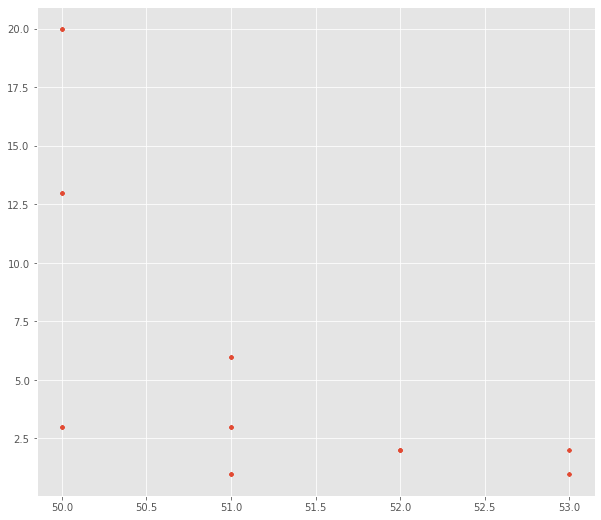

In [ ]:
f2= data.entradas.values
f1= data.tipo_sala_id.values
plt.scatter(f1,f2,s=10)

In [ ]:
from sklearn.cluster import KMeans
X = np.array(list(zip(f1,f2)))
kmeans = KMeans(n_clusters=1)
kmeans = kmeans.fit(X)
y=kmeans.predict(X)
C_ = kmeans.cluster_centers_
C_

array([[51.11538462,  5.84615385]])

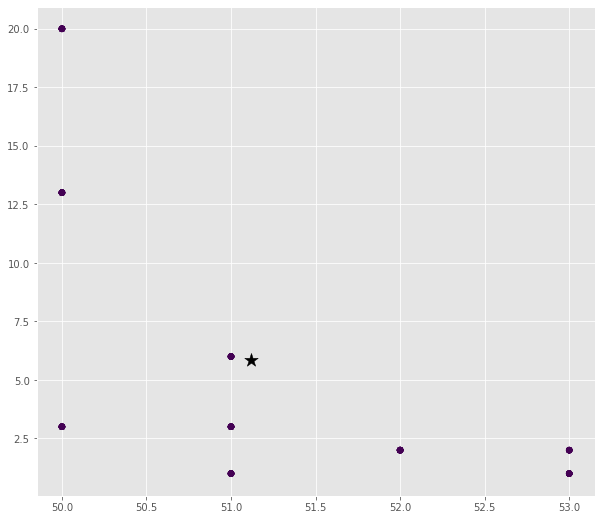

In [ ]:
fig , ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y)
ax.scatter(C_[:,0],C_[:,1],marker='*',s=200,c='k')
